[Back](https://keqideng.github.io/data_analysis_portfolio_project/)
# Ontario Covid-19 Data Analysis
Date Sept 10 2021

Prepared by ***Keqi Deng***

Data Source: [Ontario Open Data](https://data.ontario.ca/en/dataset)

## Note
This analysis used public data provided by Ontario Public Health. The main purpose of this analysis is to find the correlation between different attributes. Analysis methods are not from academical research. The author of this report does not have background in epidemiology. This study is solely for data analysis demonstration purpose only.

## Analysis Goals
* Calculate the R-rate

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
from _datetime import datetime

## Import Data
In order to import the online csv datasets from public data, use the following instant function to simplify the process:

In [2]:
def df_csv(url):
    source = requests.get(url).text
    reader = io.StringIO(source)
    return pd.read_csv(reader)

Then, import [Status of COVID-19 cases in Ontario](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11) and [Daily change in cases by PHU](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f) datasets from Ontario Government website:

In [3]:
on_covid_status_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')
on_covid_status_df['Reported Date'] = pd.to_datetime(on_covid_status_df['Reported Date'])

print(on_covid_status_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              582 non-null    datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         580 non-null    float64       
 5   Resolved                                                   570 non-null    float64       
 6   Deaths                                                     542 non-null    float64       
 7   Total Cases                        

In [4]:
phu_daily_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')
phu_daily_df['Date'] = pd.to_datetime(phu_daily_df['Date'])

print(phu_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            535 non-null    datetime64[ns]
 1   Algoma_District                 532 non-null    float64       
 2   Brant_County                    532 non-null    float64       
 3   Chatham_Kent                    532 non-null    float64       
 4   Durham_Region                   532 non-null    float64       
 5   Eastern_Ontario                 532 non-null    float64       
 6   Grey_Bruce                      532 non-null    float64       
 7   Haldimand_Norfolk               532 non-null    float64       
 8   Haliburton_Kawartha_Pine_Ridge  532 non-null    float64       
 9   Halton_Region                   532 non-null    float64       
 10  City_of_Hamilton                532 non-null    float64       
 11  Hastin

## Analysis
Calculate the rolling average of the different health regions:


In [5]:
phu_daily_avg_df = phu_daily_df.rolling(window = 7).mean()
phu_daily_avg_df.drop('Total', axis = 1, inplace = True)
phu_daily_avg_df['Date'] = phu_daily_df.Date
phu_daily_avg_df.dropna(how='any', inplace=True)
print(phu_daily_avg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 12 to 534
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Algoma_District                 523 non-null    float64       
 1   Brant_County                    523 non-null    float64       
 2   Chatham_Kent                    523 non-null    float64       
 3   Durham_Region                   523 non-null    float64       
 4   Eastern_Ontario                 523 non-null    float64       
 5   Grey_Bruce                      523 non-null    float64       
 6   Haldimand_Norfolk               523 non-null    float64       
 7   Haliburton_Kawartha_Pine_Ridge  523 non-null    float64       
 8   Halton_Region                   523 non-null    float64       
 9   City_of_Hamilton                523 non-null    float64       
 10  Hastings_Prince_Edward          523 non-null    float64       
 11  Huron

Plot the result

<AxesSubplot:>

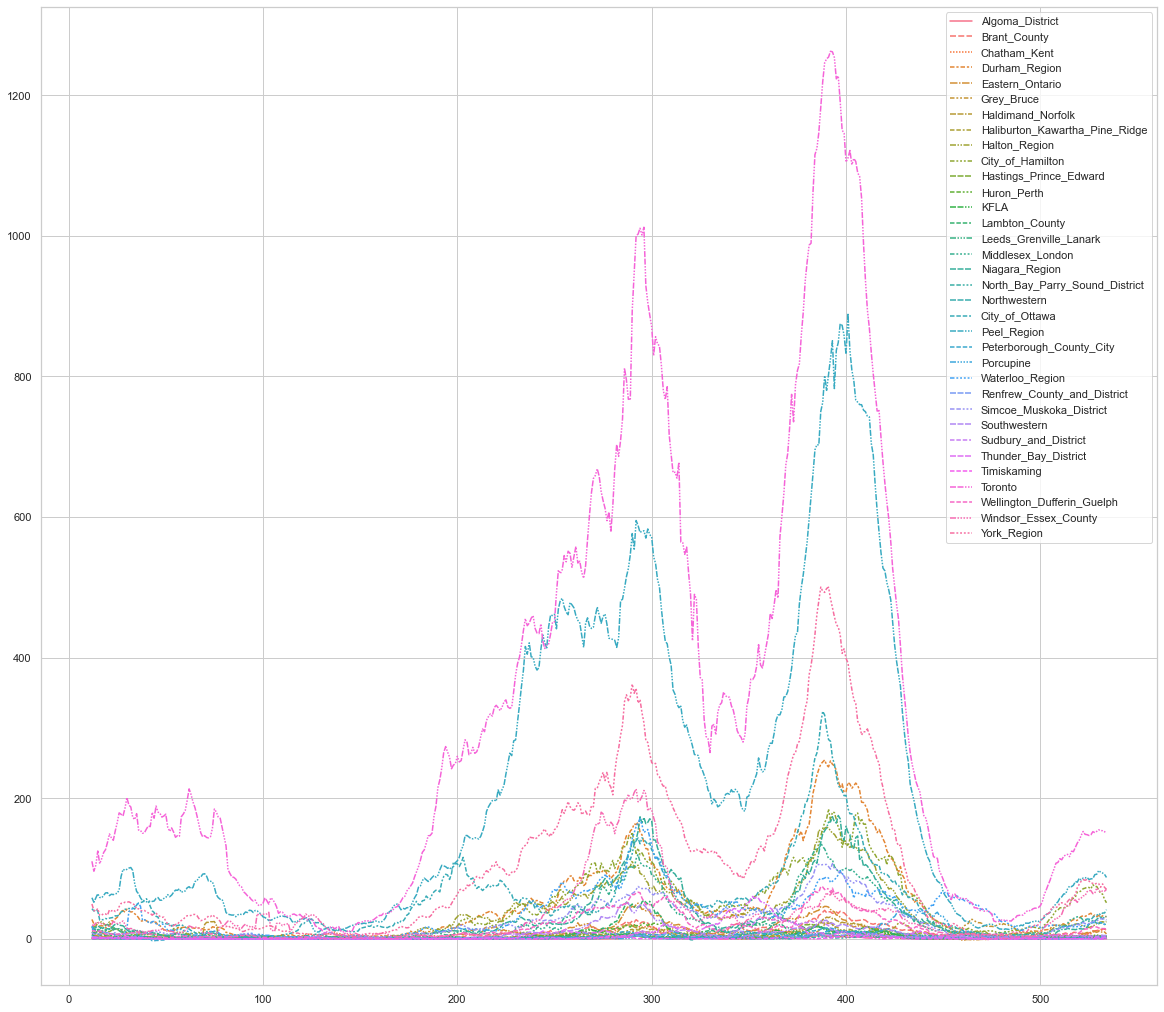

In [6]:
plt.figure(figsize=(20,18))
sns.set_theme(style="whitegrid", palette="colorblind")
sns.lineplot(data = phu_daily_avg_df)

We realize that it is hard to show the trend for specific regions.

In order to do that, we would like to focus on top 4 regions with top average daily cases:

In [7]:
phu_daily_df.mean().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_34000/3503816743.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  phu_daily_df.mean().sort_values(ascending=False)


Total                             1068.773832
Toronto                            320.845865
Peel_Region                        211.772556
York_Region                        103.723684
City_of_Ottawa                      53.875940
Durham_Region                       49.569549
City_of_Hamilton                    44.308271
Waterloo_Region                     35.947368
Windsor_Essex_County                35.304511
Halton_Region                       34.394737
Niagara_Region                      31.915414
Middlesex_London                    25.468045
Simcoe_Muskoka_District             24.753759
Wellington_Dufferin_Guelph          16.368421
Eastern_Ontario                      9.065789
Brant_County                         7.896617
Southwestern                         7.750000
Lambton_County                       6.962406
Thunder_Bay_District                 6.355263
Haldimand_Norfolk                    5.287594
Haliburton_Kawartha_Pine_Ridge       4.407895
Sudbury_and_District              

The regions with top 4 daily COVID-19 cases are Toronto, Peel, York and Ottawa.

First we stack the data from different regions for graphing:

In [8]:
phu_top_four_df = phu_daily_avg_df[['Date','Toronto','Peel_Region','York_Region','City_of_Ottawa']]
phu_top_four_df.set_index('Date', inplace=True)
phu_top_four_stack_df = pd.DataFrame(phu_top_four_df.stack().reset_index())
phu_top_four_stack_df.rename(columns={'level_1':'PHU',0:'7day_avg_infc'}, inplace=True)
print(phu_top_four_stack_df.head(5))

        Date             PHU  7day_avg_infc
0 2020-04-05         Toronto     110.428571
1 2020-04-05     Peel_Region      58.571429
2 2020-04-05     York_Region      49.714286
3 2020-04-05  City_of_Ottawa      43.000000
4 2020-04-06         Toronto      96.285714


Then use ```Seaborn``` for graphing:


<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

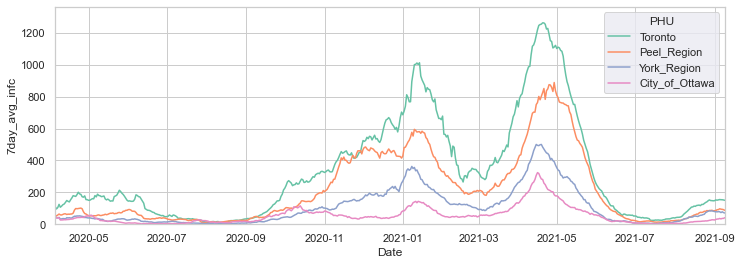

In [9]:
fig = plt.figure(figsize=(12,4))
plt.xlim(phu_top_four_stack_df.Date.min(),phu_top_four_stack_df.Date.max())
plt.ylim(0,phu_top_four_stack_df['7day_avg_infc'].max()+100)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

Separate to 4 small plots:

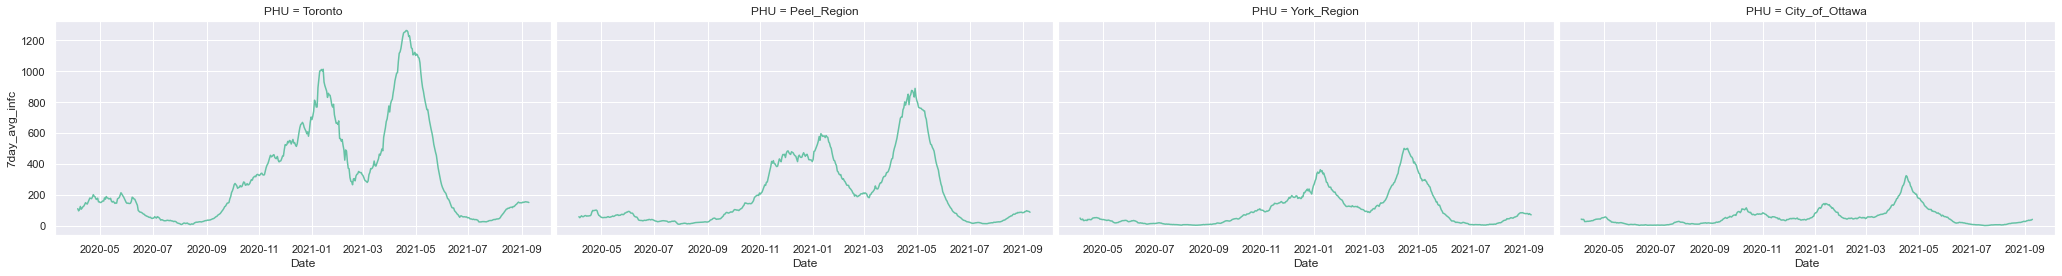

In [10]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_top_four_stack_df, col='PHU', margin_titles=True, despine=False, height=4, aspect=1.8)
fig.map(sns.lineplot, 'Date', '7day_avg_infc')
fig.figure.subplots_adjust(wspace=0.01)

Calculate the daily change rate of four different health regions:

In [11]:
phu_top_four_pct_df = phu_top_four_df.pct_change().dropna()
phu_four_reg_pct_stack = pd.DataFrame(phu_top_four_pct_df.stack()).reset_index()
phu_four_reg_pct_stack.rename(columns={'level_1':'PHU',0:'avg_inf'}, inplace=True)
print(phu_four_reg_pct_stack.head(5))

        Date             PHU   avg_inf
0 2020-04-06         Toronto -0.128072
1 2020-04-06     Peel_Region -0.109756
2 2020-04-06     York_Region -0.186782
3 2020-04-06  City_of_Ottawa -0.076412
4 2020-04-07         Toronto  0.089021


Use the same method to plot in order to compare trend:

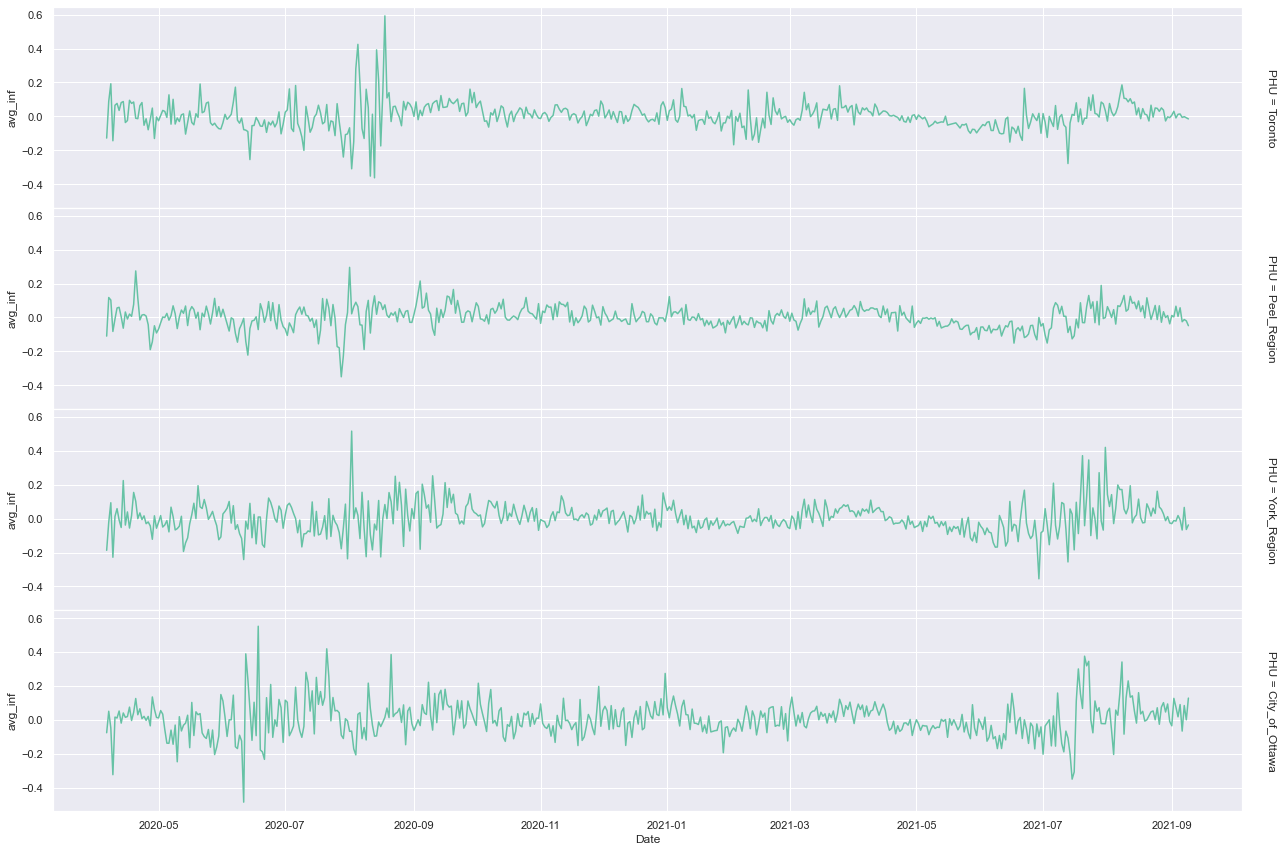

In [12]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_four_reg_pct_stack, row='PHU', margin_titles=True, despine=False, height=3, aspect=6)
fig.map(sns.lineplot, 'Date', 'avg_inf')
fig.figure.subplots_adjust(hspace=0)

For the past 30 days:

<AxesSubplot:xlabel='Date', ylabel='avg_inf'>

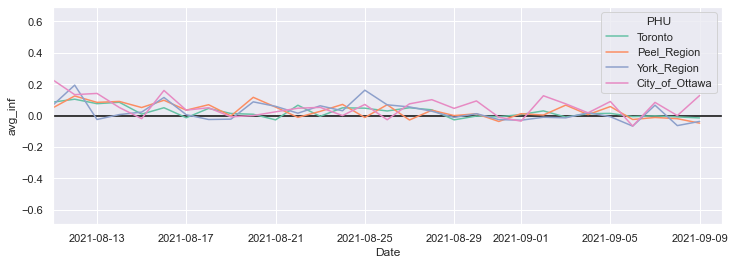

In [13]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(-phu_four_reg_pct_stack.avg_inf.max()-0.1,phu_four_reg_pct_stack.avg_inf.max()+0.1)
sns.set_theme(style='darkgrid', palette='Set2')
plt.axhline(y=0, color='black')
sns.lineplot(data=phu_four_reg_pct_stack, x = 'Date', y = 'avg_inf', hue='PHU')

<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

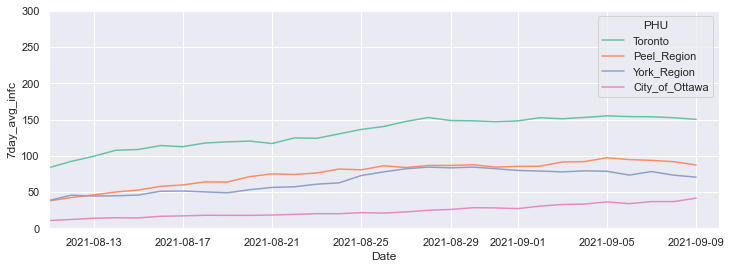

In [14]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(0,300)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

We can see that as the infection cases go up in Ontario, the daily new infected patient in Toronto, Peel and York Region are not significantly increased at lease for the past two weeks. Use the following methods to find out which region have the highest increase rate:

In [15]:
phu_pct_df = phu_daily_df.iloc[:,1:].pct_change()
phu_pct_df['Date'] = phu_daily_df.Date

#Calculate the region with highest increasing rate for the past week:
phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_34000/548176297.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)


Algoma_District                         inf
Thunder_Bay_District                    inf
Renfrew_County_and_District             inf
Leeds_Grenville_Lanark                  inf
Lambton_County                          inf
KFLA                                    inf
Hastings_Prince_Edward                  inf
Haldimand_Norfolk                       inf
Grey_Bruce                              inf
Porcupine                               inf
Peterborough_County_City          10.728571
Haliburton_Kawartha_Pine_Ridge     4.416667
Sudbury_and_District               3.392857
Wellington_Dufferin_Guelph         2.946491
Brant_County                       2.864502
Eastern_Ontario                    2.804386
Waterloo_Region                    2.660761
City_of_Ottawa                     1.765654
City_of_Hamilton                   1.429167
Chatham_Kent                       1.335423
Middlesex_London                   1.142857
North_Bay_Parry_Sound_District     0.941667
Huron_Perth                     

In order to make sense of the infinite value, make a pseudo dataset where we replace 0 to 0.1, then rank the infection case increasing rate for the past week:

In [16]:
pseudo_phu_df = phu_daily_df.replace(0,0.8)

#Percentage Change:
pseudo_phu_pct_df = pseudo_phu_df.iloc[:,1:].pct_change()
pseudo_phu_pct_df['Date'] = pseudo_phu_df.Date

#Region increasing rate ranking:
phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)
phu_change_rate

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_34000/1913290088.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)


Haldimand_Norfolk                 14.516667
Lambton_County                    13.100000
Peterborough_County_City          10.728571
KFLA                               7.183333
Grey_Bruce                         7.133333
Thunder_Bay_District               4.900000
Haliburton_Kawartha_Pine_Ridge     4.416667
Hastings_Prince_Edward             3.978571
Sudbury_and_District               3.392857
Leeds_Grenville_Lanark             3.283333
Wellington_Dufferin_Guelph         2.946491
Brant_County                       2.864502
Eastern_Ontario                    2.804386
Waterloo_Region                    2.660761
City_of_Ottawa                     1.765654
City_of_Hamilton                   1.429167
Chatham_Kent                       1.335423
Middlesex_London                   1.142857
Northwestern                       1.050000
Algoma_District                    1.000000
North_Bay_Parry_Sound_District     0.941667
Huron_Perth                        0.876190
Simcoe_Muskoka_District         

In [17]:
'''
Here we can get a list of health regions
that with daily case count increasing rate
higher than provincial average:
'''
abov_avg_phu = phu_change_rate[phu_change_rate.values>phu_change_rate['Total']]
phu_list = np.array(abov_avg_phu.index)
phu_list


array(['Haldimand_Norfolk', 'Lambton_County', 'Peterborough_County_City',
       'KFLA', 'Grey_Bruce', 'Thunder_Bay_District',
       'Haliburton_Kawartha_Pine_Ridge', 'Hastings_Prince_Edward',
       'Sudbury_and_District', 'Leeds_Grenville_Lanark',
       'Wellington_Dufferin_Guelph', 'Brant_County', 'Eastern_Ontario',
       'Waterloo_Region', 'City_of_Ottawa', 'City_of_Hamilton',
       'Chatham_Kent', 'Middlesex_London', 'Northwestern',
       'Algoma_District', 'North_Bay_Parry_Sound_District', 'Huron_Perth',
       'Simcoe_Muskoka_District', 'Niagara_Region',
       'Windsor_Essex_County', 'Halton_Region', 'York_Region'],
      dtype=object)

Then the list of the health regions would be plotted on the map: